<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Access_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Access and plot AROME Arctic weather forecasts

In [1]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr 

     |████████████████████████████████| 4.3MB 7.8MB/s 
     |████████████████████████████████| 296kB 44.4MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 0s (1,734 kB/s)
Selecting previously unselected package libgeos-de

Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [2]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
dataset = xr.open_dataset(url)

Metadata

In [3]:
dataset

<xarray.Dataset>
Dimensions:                                                                      (atmosphere_as_single_layer: 1, grib1_vLevel6: 1, height0: 1, height1: 1, height2: 1, height3: 3, height4: 1, height5: 10, height6: 1, height7: 1, height_above_msl: 1, hybrid: 65, time: 67, top_of_atmosphere: 1, x: 739, y: 949)
Coordinates:
  * time                                                                         (time) datetime64[ns] 2020-09-02T03:00:00 ... 2020-09-04T21:00:00
  * height_above_msl                                                             (height_above_msl) float32 0.0
  * height0                                                                      (height0) float32 0.0
  * height1                                                                      (height1) float32 2.0
  * height2                                                                      (height2) float32 9144.0
  * height3                                                                      (height3) float32 0.0 ... 75.0
  * height4                                                                      (height4) float32 3.0
  * height5                                                                      (height5) float32 150.0 ... 6000.0
  * height6                                                                      (height6) float32 65.0
  * height7                                                                      (height7) float32 10.0
  * hybrid                                                                       (hybrid) float64 0.009869 ... 0.9985
  * atmosphere_as_single_layer                                                   (atmosphere_as_single_layer) int16 0
  * grib1_vLevel6                                                                (grib1_vLevel6) float32 0.0
  * top_of_atmosphere                                                            (top_of_atmosphere) int16 0
  * x                                                                            (x) float32 278603.16 ... 2123603.2
  * y                                                                            (y) float32 -897931.56 ... 1472068.4
    longitude                                                                    (y, x) float64 ...
    latitude                                                                     (y, x) float64 ...
Data variables:
    forecast_reference_time                                                      datetime64[ns] ...
    p0                                                                           float64 ...
    ap                                                                           (hybrid) float64 ...
    b                                                                            (hybrid) float64 ...
    projection_lambert                                                           int32 ...
    liquid_water_content_of_surface_snow                                         (time, height0, y, x) float32 ...
    air_temperature_0m                                                           (time, height0, y, x) float32 ...
    land_area_fraction                                                           (time, height0, y, x) float32 ...
    surface_aerosol_sea                                                          (time, height0, y, x) float32 ...
    surface_aerosol_land                                                         (time, height0, y, x) float32 ...
    surface_aerosol_soot                                                         (time, height0, y, x) float32 ...
    surface_aerosol_desert                                                       (time, height0, y, x) float32 ...
    ozone_profile_a                                                              (time, height0, y, x) float32 ...
    ozone_profile_b                                                              (time, height0, y, x) float32 ...
    ozone_profile_c                                                              (time, height0, y, x) float32 ...
    spec

Find a specific point and plot the forecast.
Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [4]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.24,15.46) # For example for Longyearbyen

In [7]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

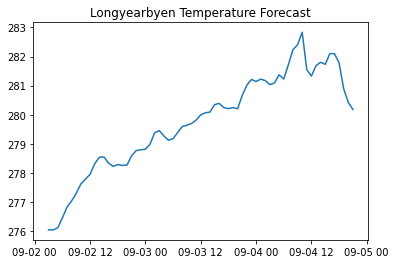

In [8]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

Plot one forecast on a map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'


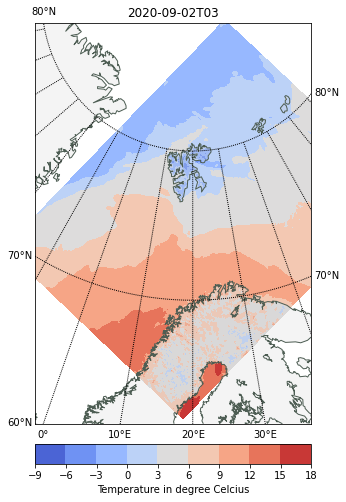

In [9]:
from mpl_toolkits.basemap import Basemap

timestep=0


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')

Explore metedata of other files

In [10]:
url_pp='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_pp_2_5km_latest.nc'
dataset_pp = xr.open_dataset(url_pp)
url_sfx='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_sfx_2_5km_latest.nc'
dataset_sfx = xr.open_dataset(url_sfx)

In [11]:
dataset_pp

<xarray.Dataset>
Dimensions:                               (height0: 1, height1: 1, height3: 1, height_above_msl: 1, p0: 1, time: 67, x: 719, y: 929)
Coordinates:
  * time                                  (time) datetime64[ns] 2020-09-02T03:00:00 ... 2020-09-04T21:00:00
  * height_above_msl                      (height_above_msl) float32 0.0
  * height0                               (height0) float32 0.0
  * height1                               (height1) float32 2.0
  * height3                               (height3) float32 10.0
  * x                                     (x) float32 303603.16 ... 2098603.2
  * y                                     (y) float32 -872931.56 ... 1447068.4
  * p0                                    (p0) float32 1013.25
    longitude                             (y, x) float64 ...
    latitude                              (y, x) float64 ...
Data variables:
    forecast_reference_time               datetime64[ns] ...
    projection_lambert                    int32 ...
    surface_air_pressure                  (time, height0, y, x) float32 ...
    relative_humidity_2m                  (time, height1, y, x) float32 ...
    x_wind_10m                            (time, height3, y, x) float32 ...
    y_wind_10m                            (time, height3, y, x) float32 ...
    air_pressure_at_sea_level             (time, height_above_msl, y, x) float32 ...
    precipitation_amount_acc              (time, height0, y, x) float32 ...
    wind_speed_of_gust                    (time, height3, y, x) float32 ...
    fog_area_fraction                     (time, height0, y, x) float32 ...
    land_area_fraction                    (y, x) float32 ...
    precipitation_amount                  (time, y, x) float32 ...
    precipitation_amount_high_estimate    (time, y, x) float32 ...
    precipitation_amount_low_estimate     (time, y, x) float32 ...
    precipitation_amount_middle_estimate  (time, y, x) float32 ...
    precipitation_amount_prob_low         (time, y, x) float32 ...
    cloud_area_fraction                   (time, y, x) float32 ...
    high_type_cloud_area_fraction         (time, y, x) float32 ...
    low_type_cloud_area_fraction          (time, y, x) float32 ...
    medium_type_cloud_area_fraction       (time, y, x) float32 ...
    helicopter_triggered_index            (time, y, x) float32 ...
    number_of_tracks                      (time, y, x) float32 ...
    strike_probability                    (time, y, x) float32 ...
    air_temperature_2m                    (time, height1, y, x) float32 ...
    altitude                              (y, x) float32 ...
Attributes:
    Conventions:                     CF-1.6
    institution:                     Norwegian Meteorological Institute, MET ...
    creator_url:                     met.no
    summary:                         AROME_Arctic is a convection-permitting ...
    title:                           AROME_Arctic 2.5km
    min_time:                        2020-09-02 03:00:00Z
    max_time:                        2020-09-04
    geospatial_lat_min:              62.0
    geospatial_lat_max:              88.0
    geospatial_lon_min:              -18.0
    geospatial_lon_max:              80.0
    references:                      unknown
    license:                         https://www.met.no/frie-meteorologiske-d...
    comment:                         none
    history:                         2020-09-02 creation by fimex
    source:                          arome_arctic
    DODS_EXTRA.Unlimited_Dimension:  time

pp has less variables and coordinated than full. What does "pp" mean?

In [12]:
dataset

<xarray.Dataset>
Dimensions:                                                                      (atmosphere_as_single_layer: 1, grib1_vLevel6: 1, height0: 1, height1: 1, height2: 1, height3: 3, height4: 1, height5: 10, height6: 1, height7: 1, height_above_msl: 1, hybrid: 65, time: 67, top_of_atmosphere: 1, x: 739, y: 949)
Coordinates:
  * time                                                                         (time) datetime64[ns] 2020-09-02T03:00:00 ... 2020-09-04T21:00:00
  * height_above_msl                                                             (height_above_msl) float32 0.0
  * height0                                                                      (height0) float32 0.0
  * height1                                                                      (height1) float32 2.0
  * height2                                                                      (height2) float32 9144.0
  * height3                                                                      (height3) float32 0.0 ... 75.0
  * height4                                                                      (height4) float32 3.0
  * height5                                                                      (height5) float32 150.0 ... 6000.0
  * height6                                                                      (height6) float32 65.0
  * height7                                                                      (height7) float32 10.0
  * hybrid                                                                       (hybrid) float64 0.009869 ... 0.9985
  * atmosphere_as_single_layer                                                   (atmosphere_as_single_layer) int16 0
  * grib1_vLevel6                                                                (grib1_vLevel6) float32 0.0
  * top_of_atmosphere                                                            (top_of_atmosphere) int16 0
  * x                                                                            (x) float32 278603.16 ... 2123603.2
  * y                                                                            (y) float32 -897931.56 ... 1472068.4
    longitude                                                                    (y, x) float64 -17.96 ... 68.83
    latitude                                                                     (y, x) float64 69.3 ... 71.11
Data variables:
    forecast_reference_time                                                      datetime64[ns] 2020-09-02T03:00:00
    p0                                                                           float64 1.013e+05
    ap                                                                           (hybrid) float64 1e+03 ... 0.0
    b                                                                            (hybrid) float64 0.0 ... 0.9985
    projection_lambert                                                           int32 -2147483647
    liquid_water_content_of_surface_snow                                         (time, height0, y, x) float32 ...
    air_temperature_0m                                                           (time, height0, y, x) float32 ...
    land_area_fraction                                                           (time, height0, y, x) float32 ...
    surface_aerosol_sea                                                          (time, height0, y, x) float32 ...
    surface_aerosol_land                                                         (time, height0, y, x) float32 ...
    surface_aerosol_soot                                                         (time, height0, y, x) float32 ...
    surface_aerosol_desert                                                       (time, height0, y, x) float32 ...
    ozone_profile_a                                                              (time, height0, y, x) float32 ...
    ozone_profile_b                                                              (time, height0, y, x) float32 ...
    ozone_profile_c                             

In [13]:
dataset_sfx

<xarray.Dataset>
Dimensions:                  (time: 67, x: 739, y: 949)
Coordinates:
  * time                     (time) datetime64[ns] 2020-09-02T03:00:00 ... 2020-09-04T21:00:00
  * x                        (x) float32 278603.16 281103.16 ... 2123603.2
  * y                        (y) float32 -897931.56 -895431.56 ... 1472068.4
    longitude                (y, x) float64 ...
    latitude                 (y, x) float64 ...
Data variables:
    forecast_reference_time  datetime64[ns] ...
    projection_lambert       int32 ...
    SIC                      (time, y, x) float32 ...
    SST                      (time, y, x) float32 ...
    TICE_01                  (time, y, x) float32 ...
    TICE_02                  (time, y, x) float32 ...
    TICE_03                  (time, y, x) float32 ...
    TICE_04                  (time, y, x) float32 ...
    ICE_THK                  (time, y, x) float32 ...
    WSN_ICE_01               (time, y, x) float32 ...
    WSN_ICE_02               (time, y, x) float32 ...
    WSN_ICE_03               (time, y, x) float32 ...
    RSN_ICE_01               (time, y, x) float32 ...
    RSN_ICE_02               (time, y, x) float32 ...
    RSN_ICE_03               (time, y, x) float32 ...
    ASN_ICE                  (time, y, x) float32 ...
    TS_WATER                 (time, y, x) float32 ...
    T_SNOW                   (time, y, x) float32 ...
    T_ICE                    (time, y, x) float32 ...
    T_MNW                    (time, y, x) float32 ...
    T_WML                    (time, y, x) float32 ...
    T_BOT                    (time, y, x) float32 ...
    H_SNOW                   (time, y, x) float32 ...
    H_ICE                    (time, y, x) float32 ...
    H_ML                     (time, y, x) float32 ...
    X001TG1                  (time, y, x) float32 ...
    X002TG1                  (time, y, x) float32 ...
    X001TG2                  (time, y, x) float32 ...
    X002TG2                  (time, y, x) float32 ...
    X001WG1                  (time, y, x) float32 ...
    X002WG1                  (time, y, x) float32 ...
    X001WG2                  (time, y, x) float32 ...
    X002WG2                  (time, y, x) float32 ...
    X001WGI1                 (time, y, x) float32 ...
    X002WGI1                 (time, y, x) float32 ...
    X001WGI2                 (time, y, x) float32 ...
    X002WGI2                 (time, y, x) float32 ...
    X001WSN_VEG1             (time, y, x) float32 ...
    X002WSN_VEG1             (time, y, x) float32 ...
    X001RSN_VEG1             (time, y, x) float32 ...
    X002RSN_VEG1             (time, y, x) float32 ...
    X001ASN_VEG              (time, y, x) float32 ...
    X002ASN_VEG              (time, y, x) float32 ...
    WS_ROAD                  (time, y, x) float32 ...
    TSN_ICE_01               (time, y, x) float32 ...
    TSN_ICE_02               (time, y, x) float32 ...
    TSN_ICE_03               (time, y, x) float32 ...
    DSN_T_ICE                (time, y, x) float32 ...
    T2M_SEA                  (time, y, x) float32 ...
    Q2M_SEA                  (time, y, x) float32 ...
    HU2M_SEA                 (time, y, x) float32 ...
    ZON10M_SEA               (time, y, x) float32 ...
    MER10M_SEA               (time, y, x) float32 ...
    T2M_WAT                  (time, y, x) float32 ...
    Q2M_WAT                  (time, y, x) float32 ...
    HU2M_WAT                 (time, y, x) float32 ...
    ZON10M_WAT               (time, y, x) float32 ...
    MER10M_WAT               (time, y, x) float32 ...
    RNC_ISBA                 (time, y, x) float32 ...
    HC_ISBA                  (time, y, x) float32 ...
    LEC_ISBA                 (time, y, x) float32 ...
    FMUC_ISBA                (time, y, x) float32 ...
    FMVC_ISBA                (time, y, x) float32 ...
    T2M_ISBA                 (time, y, x) float32 ...
    Q2M_ISBA                 (time, y, x) float32 ...
    HU2M_ISBA                (time, y, x) float32 ...
    ZON10M_I

Variables of dataset_sfx seems to be off_shore forecast related? Many strange variables.

Plotting point forecast from pp and sfx

In [ ]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.24,15.46) # For example for Longyearbyen
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()